In [2]:
# import packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve

In [3]:
# read dataset
df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv',na_values='NA')
df.head(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


### **Part 1: Build the Model**

In [9]:
y = df.cvd_4types	
X = df.drop('cvd_4types', axis= 1) # drop record
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
metrics = [accuracy_score, roc_auc_score, recall_score, precision_score, f1_score]
columns = [i.__name__ for i in metrics] 
models = pd.DataFrame(columns=columns, index=solvers)
for solver, row in zip(solvers, range(len(models))):
    clf = LogisticRegression(
        random_state=101,
        C=1,
        solver=solver, 
        max_iter=4000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores = [score(y_test, y_pred) for score in metrics]
    models.iloc[row] = scores
models

,accuracy_score,roc_auc_score,recall_score,precision_score,f1_score
newton-cg,0.70037,0.675787,0.858696,0.689354,0.764763
lbfgs,0.701603,0.677211,0.858696,0.690559,0.765504
liblinear,0.697904,0.672938,0.858696,0.686957,0.763285
sag,0.680641,0.655695,0.841304,0.675393,0.749274
saga,0.683107,0.658881,0.83913,0.678383,0.750243


### **Part 2: Display Feature Importance**

In [10]:
clf = LogisticRegression(
        random_state=101,
        C=1,
        solver='newton-cg', 
        max_iter=4000)
clf.fit(X_train, y_train)
# Display coefficients
results = pd.Series(clf.coef_[0]*np.std(X_train, 0), index=[col for col in df.iloc[:,1:].columns])
results.sort_values(ascending=False) # sort by importance

waist           1.129035
educat          0.198694
parrptdiab      0.130142
tired25         0.114620
srhype          0.064611
bend25          0.052177
cgpkyr          0.007714
age_s1         -0.004997
tea15          -0.042736
happy25        -0.090900
mstat          -0.125747
neck20         -0.199337
av_weight_kg   -0.205163
race           -0.298305
hlthlm25       -0.401776
hip            -0.611633
dtype: float64

### **Part 3: ROC Curve**

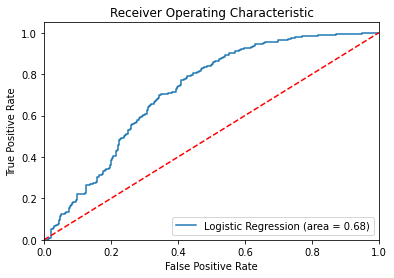

In [12]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() # plot roc curve